In [6]:
import os
import numpy as np
from PIL import Image, ImageDraw
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, models, transforms

In [7]:
# Load local libraries
# ROOT contais the project directory 
os.chdir(os.path.dirname(os.getcwd()))
os.getcwd()

'/home/ubuntu/master_thesis'

In [8]:
# Import local libraries
from src.transformations.CC_RRC_RVF_RHF_RA import get_transform as gt_train
from src.transformations.CC_R import get_transform as gt_valid
from src.plot_images import plot_images

.ipynb_checkpoints .ipynb_checkpoints .ipynb_checkpoints .ipynb_checkpoints .ipynb_checkpoints .ipynb_checkpoints .ipynb_checkpoints


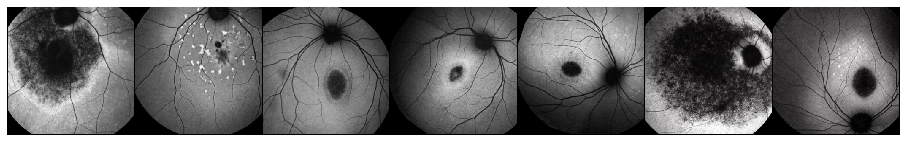

In [9]:
is_grayscale = False
im_size = 300
crop_size = 1535
batch_size = 8
num_workers = 8
randomcrop = 1300
#randomcrop=False
train_pth = "data/IR/right"

dataset = datasets.ImageFolder(train_pth, gt_train(crop_size=crop_size, resize=im_size, grayscale=is_grayscale, randomcrop=randomcrop))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
plot_images(dataloader, dataset.classes)

In [10]:
images, labels = next(iter(dataloader))

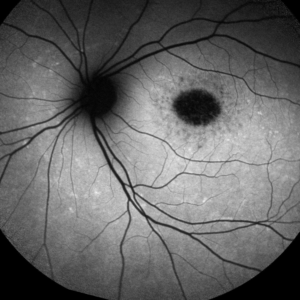

In [11]:
# Open the input image as numpy array, convert to RGB
#img=Image.open("data/IR/left/left_NISO-NTMC058-KA058.png").convert("RGB")
cutimage = images[1].numpy().transpose((1, 2, 0))
cutimage = (cutimage*255).astype(np.uint8)
img = Image.fromarray(cutimage)
img

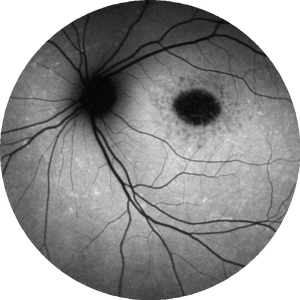

In [12]:
from PIL import Image, ImageOps, ImageDraw
im = Image.fromarray(cutimage)


bigsize = (im.size[0] * 3, im.size[1] * 3)
mask = Image.new('L', bigsize, 0)
draw = ImageDraw.Draw(mask) 
draw.ellipse((0, 0) + bigsize, fill=255)
mask = mask.resize(im.size, Image.ANTIALIAS)
im.putalpha(mask)

output = ImageOps.fit(im, mask.size, centering=(0.5, 0.5))
output.putalpha(mask)
output
#output.save('output.png')

#background = Image.open('back.jpg')
#background.paste(im, (150, 10), im)
#background.save('overlap.png')

# Gausian Blur

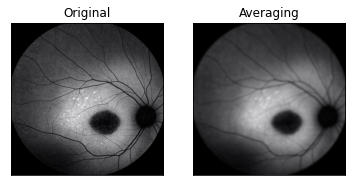

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/IR/right/right_NISO-NTMC113-KA114.png')

#kernel = np.ones((3,3),np.float32)/9
blur = cv2.GaussianBlur(img,(55,55), 0)
#dst = cv2.filter2D(img, -1, kernel)
dst= blur

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# White Noise

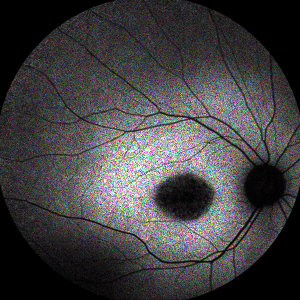

In [14]:
from PIL import Image
import numpy as np
from skimage.util import random_noise

im = Image.open("data/IR/right/right_NISO-NTMC113-KA114.png")
im = im.resize(size=(300,300))
im_arr = np.asarray(im)

# random_noise() method will convert image in [0, 255] to [0, 1.0],
# inherently it use np.random.normal() to create normal distribution
# and adds the generated noised back to image

noise_img = random_noise(im_arr, mode='speckle', var=0.25 **2)
noise_img = (255*noise_img).astype(np.uint8)

img = Image.fromarray(noise_img)
img

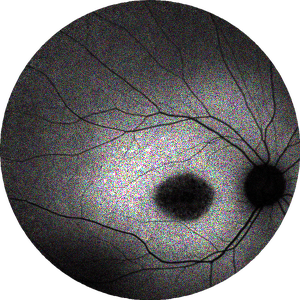

In [15]:
bigsize = (img.size[0] * 3, img.size[1] * 3)
mask = Image.new('L', bigsize, 0)
draw = ImageDraw.Draw(mask) 
draw.ellipse((0, 0) + bigsize, fill=255)
mask = mask.resize(img.size, Image.ANTIALIAS)
img.putalpha(mask)

output = ImageOps.fit(img, mask.size, centering=(0.5, 0.5))
output.putalpha(mask)
output